In [1]:
#Solo usar si esta en colab
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/proyectoia')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/proyectoia


# Classification of Anomalies of Vertebral Column by Biomechanical Attributes

---



In [181]:
#PRIMER BOCETO PROYECTO IA
#Julian David Colmenares
#Juan Sebastian Leon
#Laura Sofia Vargas 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

1. Descargamos los datasets para nuestro proyecto.

Estos dos datasets tienen exactamente los mismos datos, a excepcion de la columna 'class'; en el primer dataset se clasifica entre 'Anormal' y 'Normal', mientras que en el segundo se encuentran 3 diferentes clases, 'Normal', 'Hernia' y 'Spondylolisthesis' 

---



In [182]:
data2 = pd.read_csv('datasets_469690_880822_column_3C.csv')
data1 = pd.read_csv('datasets_469690_880822_column_2C.csv')

In [183]:
data1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [184]:
data2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [185]:
print(data1.shape)
print(data2.shape)

(310, 7)
(310, 7)


2. Realizamos un analisis de la cantidad de datos de cada clase para el primer dataset

In [186]:
#Dividimos el dataset para observar cuantos datos hay de cada clase
dataAbnormal=data1[data1['class']=='Abnormal']
dataNormal=data1[data1['class']!='Abnormal']
print(dataNormal.shape)
print(dataAbnormal.shape)

(100, 7)
(210, 7)


como se puede observar, hay un desbalance de clases que posteriormente solucionaremos.

In [187]:
#uniendo los dos dataset nuevamente
dataBin = pd.concat((dataNormal, dataAbnormal)).sample(frac=1).reset_index(drop=True)

#Para trabajar con valores enteros en vez de cadenas de texto, cambiamos los valores 'Normal' por 0, y 'Abnormal' por 1
dataBin=dataBin.replace(to_replace='Normal', value=0, regex=True)
dataBin=dataBin.replace(to_replace='Abnormal', value=1, regex=True)
dataBin=np.random.permutation(dataBin.values)
dataBin=pd.DataFrame(dataBin)
dataBin.head(10)

,0,1,2,3,4,5,6
0,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873,1.0
1,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,1.0
2,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,0.0
3,40.746996,1.835524,50.000000,38.911472,139.247150,0.668557,0.0
4,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,1.0
5,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0.0
6,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0.0
7,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,1.0
8,84.998956,29.610098,83.352194,55.388858,126.912990,71.321175,1.0
9,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,1.0


3. Verificamos si existe correlación entre las diferentes columnas del dataset

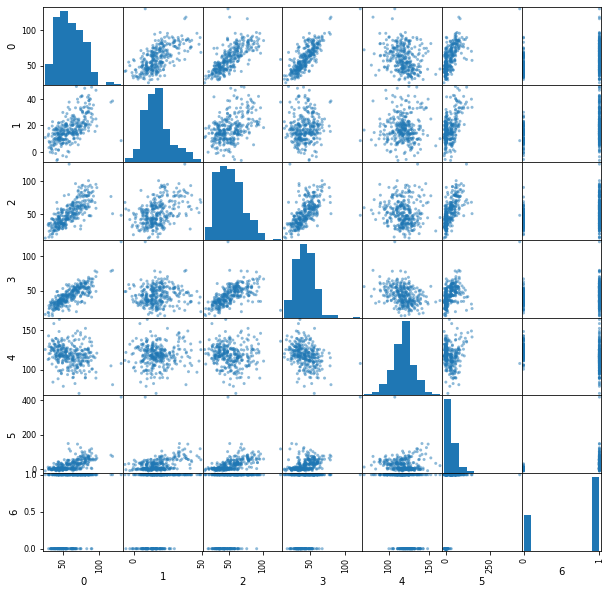

In [188]:
pd.plotting.scatter_matrix(dataBin, figsize=(10,10));

In [246]:
#elimiinamos columna con correlacion
#del dataBin[0]
dataBin.head()

,0,1,2,3,4,5,6
0,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873,1.0
1,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,1.0
2,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,0.0
3,40.746996,1.835524,50.000000,38.911472,139.247150,0.668557,0.0
4,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,1.0


4. Separamos los datos de Train y de Test para el primer dataset.

In [189]:
#dividimos entre 0 y 1 (Abnormal y Normal)
dataAbnormal=dataBin[dataBin[6]==1]
dataNormal=dataBin[dataBin[6]!=1]

#permutamos abnormales y Normales
np.random.permutation(dataAbnormal.values)
np.random.permutation(dataNormal.values)

#elegimos 90 abnomales y 90 normales para realizar el entrenamiento
dataAbnormalFit=dataAbnormal.values[:90,:]
dataNormalFit=dataNormal.values[:90, :]

#el resto de los datos los tomamos para test
dataAbnormalTest=dataAbnormal.values[90:,:]
dataNormalTest=dataNormal.values[90:,:]

dataAbnormalFit=pd.DataFrame(dataAbnormalFit)
dataNormalFit=pd.DataFrame(dataNormalFit)
dataAbnormalTest=pd.DataFrame(dataAbnormalTest)
dataNormalTest=pd.DataFrame(dataNormalTest)


In [247]:
#unir test y fit en cada dataset
dataBinTrain=pd.concat([dataAbnormalFit, dataNormalFit])
dataBinTest=pd.concat([dataAbnormalTest, dataNormalTest])
#dataBinTrain.shape
dataBinTrain.head(10)

,0,1,2,3,4,5,6
0,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873,1.0
1,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,1.0
2,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,1.0
3,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,1.0
4,84.998956,29.610098,83.352194,55.388858,126.912990,71.321175,1.0
5,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,1.0
6,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,1.0
7,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,1.0
8,83.933009,41.286305,62.000000,42.646703,115.012334,26.588100,1.0
9,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,1.0


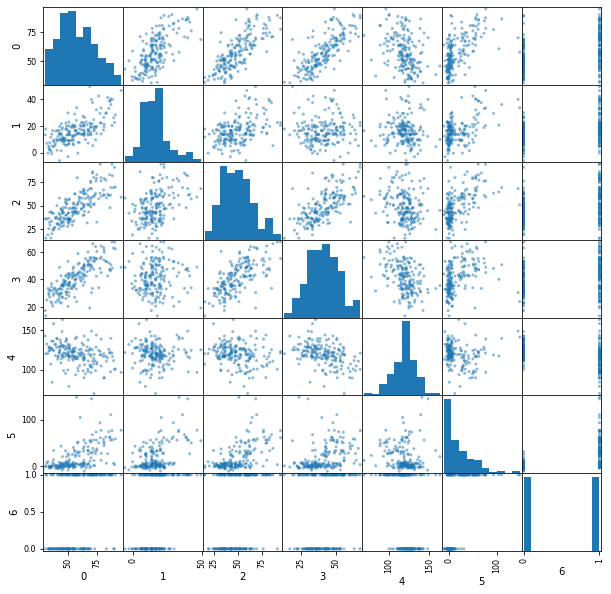

In [46]:
pd.plotting.scatter_matrix(dataBinTrain, figsize=(10,10));

In [248]:
#permutamos de nuevo antes de pasar a entrenar

dataBinTrain=np.random.permutation(dataBinTrain.values)
dataBinTest=np.random.permutation(dataBinTest.values)
#dataBinTrain=pd.DataFrame(dataBinTrain)
#dataBinTest=pd.DataFrame(dataBinTest)
#dataBinTrain.head(10)

5. Nos disponemos a entrenar con diferentes estimadores. Para facilitar esta tarea crearemos 

In [249]:
#Creamos una tabla para comparar a futuro los diferentes estimadores
Tabla=np.array([['Estimador', 'Score']])
print(Tabla)
TablaCross=np.array([['Estimador', 'Score']])
print(TablaCross)

[['Estimador' 'Score']]
[['Estimador' 'Score']]


In [252]:
#Separamos los labels
X_train = dataBinTrain[:,:-1]
X_test = dataBinTest[:,:-1]
y_train = dataBinTrain[:,-1]
y_test = dataBinTest[:,-1]

In [253]:
def Train_Test(est, Tabla):
  est.fit(X_train,y_train)
  predictions=est.predict(X_test)
  accuracy_score(predictions,y_test)
  Tabla=np.append(Tabla, [[est, score]], axis=0)
  return Tabla

In [254]:
def Train_Test_cross(est, TablaCross):
  score = cross_val_score(est, X_train, y_train, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
  score = np.mean(score)
  TablaCross=np.append(Tabla, [[est, score]], axis=0)
  return TablaCross

In [255]:
#Llamamos a la funcion de train con diferentes clasificadores

#Estimadores Gaussian NB
est = GaussianNB()
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)

In [256]:
print(Tabla)

[['Estimador' 'Score']
 [GaussianNB(priors=None, var_smoothing=1e-09) 0.9000000000000001]]


In [257]:
#Estimadores DecisionTree
est = DecisionTreeClassifier()
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
est = DecisionTreeClassifier(max_depth=10)
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
est = DecisionTreeClassifier(max_depth=20)
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
est = DecisionTreeClassifier(max_depth=30)
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)

In [258]:
print(Tabla)

[['Estimador' 'Score']
 [GaussianNB(priors=None, var_smoothing=1e-09) 0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [Decision

In [207]:
#Estimadores SVC
est = SVC()
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
est = SVC(kernel='linear')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)

In [200]:
est = SVC(kernel='poly', degree=2, gamma='scale')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
est = SVC(kernel='poly', degree=2, gamma='auto')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)

KeyboardInterrupt: ignored

In [ ]:
est = SVC(kernel='poly', degree=3, gamma='scale')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
est = SVC(kernel='poly', degree=3, gamma='scale')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)

In [208]:
print(Tabla)

[['Estimador' 'Score']
 [GaussianNB(priors=None, var_smoothing=1e-09) 0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [Decision

In [209]:
print(TablaCross)

[['Estimador' 'Score']
 [GaussianNB(priors=None, var_smoothing=1e-09) 0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [Decision

# **`Segundo dataset`**

In [210]:
data2["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

 **Eliminamos los casos Normales**

In [211]:
## eliminamos lo casos normales
dataClass=data2[data2['class']!='Normal']

In [212]:
##cambio de label "class" con 1='hernia' y 0='Spondylolisthesis'
dataClass=dataClass.replace(to_replace='Spondylolisthesis', value=0, regex=True)
dataClass=dataClass.replace(to_replace='Hernia', value=1, regex=True)
#dataClass=np.random.permutation(dataClass.values)
#mezclar valores de "dataClass"
dataClass =dataClass.sample(frac=1).reset_index(drop=True)

dataClass.head(10)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,67.263149,7.194661,51.696887,60.068488,97.801085,42.136943,0
1,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,1
2,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134,0
3,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,0
4,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1
5,76.326002,42.396204,57.200000,33.929797,124.267007,50.127457,0
6,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,0
7,80.988074,36.843172,86.960602,44.144903,141.088149,85.872152,0
8,55.512212,20.095157,44.000000,35.417055,122.648753,34.552946,0
9,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1


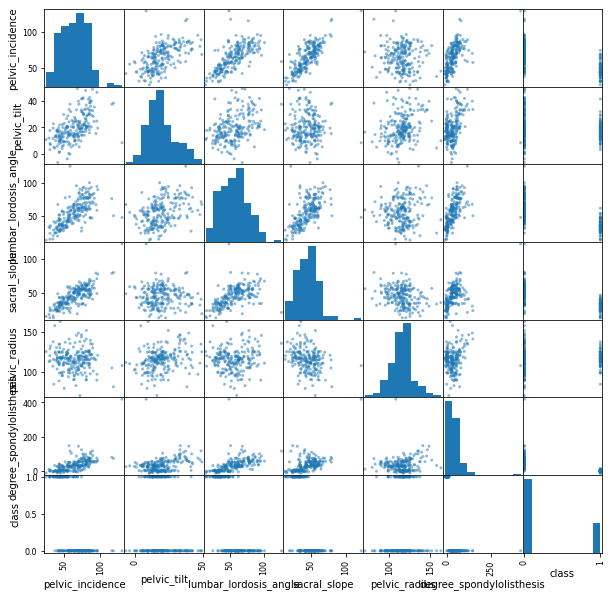

In [213]:
pd.plotting.scatter_matrix(dataClass, figsize=(10,10));

In [214]:
#elimiinamos columna con correlacion
#del dataClass["pelvic_incidence"]
dataBin.head()

,0,1,2,3,4,5,6
0,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873,1.0
1,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,1.0
2,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,0.0
3,40.746996,1.835524,50.000000,38.911472,139.247150,0.668557,0.0
4,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,1.0


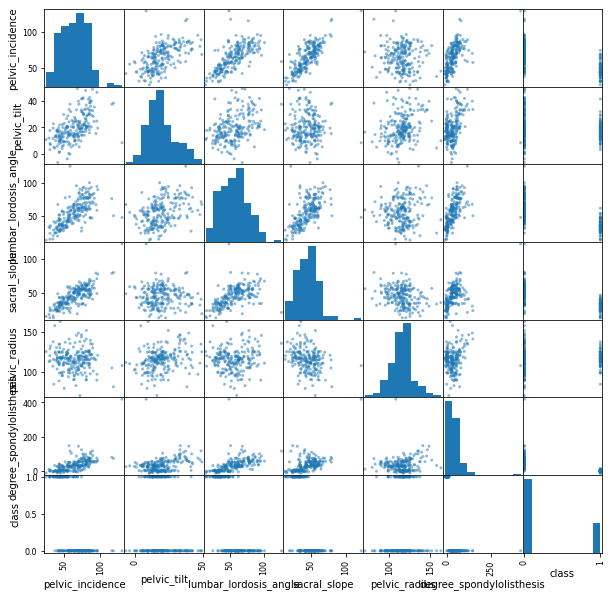

In [215]:
pd.plotting.scatter_matrix(dataClass, figsize=(10,10));

In [221]:
#dividimos entre 0 y 1
dataHernia=dataClass[dataClass['class']==1]
dataSpondylolisthesis=dataClass[dataClass['class']!=1]
print(dataHernia.shape)
print(dataSpondylolisthesis.shape)

(60, 7)
(150, 7)


In [222]:
#elegimos 50 Hernia y 50 Spondylolisthesis
dataSpondylolisthesisTrain=dataSpondylolisthesis.values[:50,:]
dataHerniaTrain=dataHernia.values[:50, :]
print(dataSpondylolisthesisTrain.shape,dataHerniaTrain.shape,"train")

#elegimos datos del test con los restantes
dataSpondylolisthesisTest=dataSpondylolisthesis.values[50:,:]
dataHerniaTest=dataHernia.values[50:,:]
print(dataSpondylolisthesisTest.shape,dataHerniaTest.shape,"test")


(50, 7) (50, 7) train
(100, 7) (10, 7) test


In [228]:
#permutamos Hernia y Spondylolisthesis tanto test como train
np.random.permutation(dataHerniaTrain)
np.random.permutation(dataSpondylolisthesisTrain)
np.random.permutation(dataHerniaTest)
np.random.permutation(dataSpondylolisthesisTest)

#convertimos de nuevo los datos de formato numpy a dataframe 
dataSpondylolisthesisFit=pd.DataFrame(dataSpondylolisthesisTest)
dataHerniaFit=pd.DataFrame(dataHerniaTest)
dataSpondylolisthesisTrain=pd.DataFrame(dataSpondylolisthesisTrain)
dataHerniaTrain=pd.DataFrame(dataHerniaTrain)

In [229]:
#unimops de nuevo los dataframe
dataClassTrain=pd.concat([dataSpondylolisthesisTrain, dataHerniaTrain])
dataClassTest=pd.concat([dataSpondylolisthesisFit, dataHerniaFit])
print(dataClassTest.shape)

(110, 7)


In [230]:
#permutamos de nuevo antes de pasar a aentrenar
dataClassTrain=np.random.permutation(dataClassTrain.values)
dataClassTest=np.random.permutation(dataClassTest.values)
dataClassTrain=pd.DataFrame(dataClassTrain)
dataClassTest=pd.DataFrame(dataClassTest)
dataClassTrain.head(10)

,0,1,2,3,4,5,6
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1.0
1,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,0.0
2,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0.0
3,49.782121,6.466805,53.000000,43.315316,110.864783,25.335647,0.0
4,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,1.0
5,85.352315,15.844910,71.668660,69.507405,124.419787,76.020603,0.0
6,79.476978,26.732268,70.650982,52.744711,118.588669,61.700598,0.0
7,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1.0
8,41.187770,5.792974,42.867392,35.394796,103.348880,27.660277,0.0
9,80.988074,36.843172,86.960602,44.144903,141.088149,85.872152,0.0


In [232]:
X_train = dataClassTrain.values[:,:-1]
X_test = dataClassTest.values[:,:-1]
y_train = dataClassTrain.values[:,-1]
y_test = dataClassTest.values[:,-1]

In [233]:
#Creamos una tabla para comparar a futuro los diferentes estimadores
Tabla2=np.array([['Estimador', 'Score']])
print(Tabla2)
TablaCross2=np.array([['Estimador', 'Score']])
print(TablaCross2)

[['Estimador' 'Score']]
[['Estimador' 'Score']]


In [234]:
#Llamamos a la funcion de train con diferentes clasificadores

#Estimadores Gaussian NB
est = GaussianNB()
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)

In [235]:
#Estimadores DecisionTree
est = DecisionTreeClassifier()
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
est = DecisionTreeClassifier(max_depth=10)
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
est = DecisionTreeClassifier(max_depth=20)
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
est = DecisionTreeClassifier(max_depth=30)
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)

In [236]:
#Estimadores SVC
est = SVC()
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
est = SVC(kernel='linear')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)

In [ ]:
est = SVC(kernel='poly', degree=2, gamma='scale')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
est = SVC(kernel='poly', degree=2, gamma='auto')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
est = SVC(kernel='poly', degree=3, gamma='scale')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
est = SVC(kernel='poly', degree=3, gamma='scale')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)

In [237]:
print(Tabla2)
print(TablaCross2)

[['Estimador' 'Score']
 [GaussianNB(priors=None, var_smoothing=1e-09) 0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9000000000000001]
 [Decision